In [164]:
import seaborn as sns
sns.set(style="ticks", context="talk")

In [1]:
# get formating done automatically according to style `black`
%load_ext lab_black

In [ ]:
!wget https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT.4.6.0.0.median.nc

In [105]:
urlpath = "HadCRUT.4.6.0.0.median.nc"

In [106]:
!ls -all --block-size='MB' /work/mh0727/m300524/HadCRUT.4.6.0.0.median.nc

-rw-r--r-- 1 m300524 mh0727 22MB Jul 17 12:42 /work/mh0727/m300524/HadCRUT.4.6.0.0.median.nc


# read netcdf
the old netcdf way 🙄 

In [107]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

In [108]:
ds = Dataset(urlpath)

[netcdf](https://www.unidata.ucar.edu/software/netcdf/) is a self-describing data format.

In [109]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: HadCRUT4 near-surface temperature ensemble data - ensemble median
    institution: Met Office Hadley Centre / Climatic Research Unit, University of East Anglia
    history: Updated at 09/07/2020 14:17:54
    source: CRUTEM.4.6.0.0, HadSST.3.1.1.0
    comment: 
    reference: Morice, C. P., J. J. Kennedy, N. A. Rayner, and P. D. Jones (2012), Quantifying uncertainties in global and regional temperature change using an ensemble of observational estimates: The HadCRUT4 dataset, J. Geophys. Res., doi:10.1029/2011JD017187
    version: HadCRUT.4.6.0.0
    Conventions: CF-1.0
    ensemble_members: 100
    ensemble_member_index: 0
    dimensions(sizes): latitude(36), longitude(72), field_status_string_length(1), time(2045)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), float32 time(time), float32 temperature_anomaly(time,latitude,longitude), |S1 field_status(ti

In [110]:
ds.variables.keys()

odict_keys(['latitude', 'longitude', 'time', 'temperature_anomaly', 'field_status'])

In [111]:
temp = ds.variables["temperature_anomaly"]
temp

<class 'netCDF4._netCDF4.Variable'>
float32 temperature_anomaly(time, latitude, longitude)
    long_name: near_surface_temperature_anomaly
    units: K
    missing_value: -1e+30
    _FillValue: -1e+30
    reference_period: [1961 1990]
unlimited dimensions: time
current shape = (2045, 36, 72)
filling on

In [112]:
temp.size / 1e6

5.30064

In [113]:
temp.shape

(2045, 36, 72)

In [114]:
time = ds.variables['time']
time

<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    standard_name: time
    long_name: time
    units: days since 1850-1-1 00:00:00
    calendar: gregorian
    start_year: 1850
    end_year: 2020
    start_month: 1
    end_month: 5
    axis: T
unlimited dimensions: time
current shape = (2045,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [115]:
# remember time first axis
last_timestep = temp[-1, :, :]
last_timestep

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., 0.9777460694313049, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ..., False,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-1e+30,
  dtype=float32)

In [116]:
type(last_timestep)

numpy.ma.core.MaskedArray

In [117]:
last_timestep.shape

(36, 72)

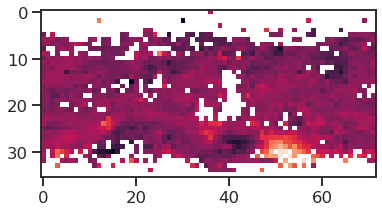

In [165]:
plt.imshow(last_timestep)

- only values shown
- no reference about
    - variable name
    - scale
    - time
    - unit
- How to plot November 1989? 🤔
- How to plot timeseries for Hamburg? 🤔

# xarray

In [119]:
import xarray as xr

ds = xr.open_dataset(urlpath)
ds

<xarray.Dataset>
Dimensions:              (latitude: 36, longitude: 72, time: 2045)
Coordinates:
  * latitude             (latitude) float32 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude            (longitude) float32 -177.5 -172.5 ... 172.5 177.5
  * time                 (time) datetime64[ns] 1850-01-16T12:00:00 ... 2020-0...
Data variables:
    temperature_anomaly  (time, latitude, longitude) float32 ...
    field_status         (time) |S1 ...
Attributes:
    title:                  HadCRUT4 near-surface temperature ensemble data -...
    institution:            Met Office Hadley Centre / Climatic Research Unit...
    history:                Updated at 09/07/2020 14:17:54
    source:                 CRUTEM.4.6.0.0, HadSST.3.1.1.0
    comment:                
    reference:              Morice, C. P., J. J. Kennedy, N. A. Rayner, and P...
    version:                HadCRUT.4.6.0.0
    Conventions:            CF-1.0
    ensemble_members:       100
    ensemble_member_index:  0

In [120]:
# xr.Dataset useful when working with more than one variable
# one variable usually xr.DataArray like a dict
da = ds["temperature_anomaly"]
# underlying numpy.ndarray
type(da.values)

numpy.ndarray

In [121]:
# xr.DataArray and xr.Dataset dimensions gives axes names
da.dims

('time', 'latitude', 'longitude')

In [122]:
# xr.DataArray and xr.Dataset coordinates describe dimensions
ds.coords

Coordinates:
  * latitude   (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float32 -177.5 -172.5 -167.5 ... 167.5 172.5 177.5
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2020-05-16T12:00:00

In [123]:
# remaining xr.DataArray metadata in attrs
da.attrs

{'long_name': 'near_surface_temperature_anomaly',
 'units': 'K',
 'reference_period': array([1961, 1990], dtype=int16)}

In [124]:
da.attrs["units"]

'K'

In [125]:
# remaining xr.Dataset metadata in attrs
ds.attrs

{'title': 'HadCRUT4 near-surface temperature ensemble data - ensemble median',
 'institution': 'Met Office Hadley Centre / Climatic Research Unit, University of East Anglia',
 'history': 'Updated at 09/07/2020 14:17:54',
 'source': 'CRUTEM.4.6.0.0, HadSST.3.1.1.0',
 'comment': '',
 'reference': 'Morice, C. P., J. J. Kennedy, N. A. Rayner, and P. D. Jones (2012), Quantifying uncertainties in global and regional temperature change using an ensemble of observational estimates: The HadCRUT4 dataset, J. Geophys. Res., doi:10.1029/2011JD017187',
 'version': 'HadCRUT.4.6.0.0',
 'Conventions': 'CF-1.0',
 'ensemble_members': 100,
 'ensemble_member_index': 0}

## Intuitive API
when familiar with `pandas`

In [24]:
%%html
<iframe src="http://xarray.pydata.org/en/stable/api.html#indexing" width="1200" height="400"></iframe>

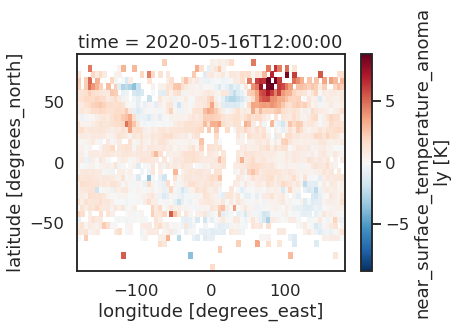

In [127]:
# only xr.dataArray can be plotted
# xr plots context: dim names, coords, colorbar
da.isel(time=-1).plot()

## `xarray.plot()` understands `matplotlib` API

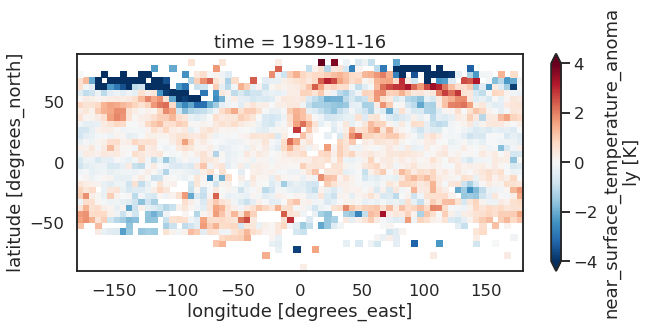

In [128]:
# xr understand datetime format
da.sel(time="1989-11").plot(figsize=(10, 4), vmin=-4, vmax=4, cmap="RdBu_r")

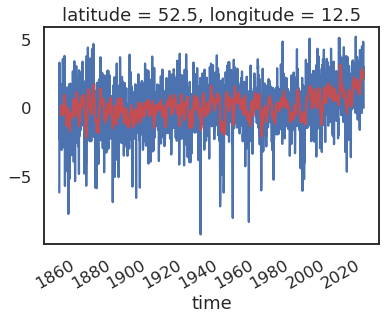

In [129]:
# find timeseries for Hamburg
# Hamburg lon lat not exactly given, too coarse resolution
hh = da.sel(latitude=53, longitude=10, method="nearest")
hh.plot(label="monthly")
hh.rolling(time=12).mean().plot(c="r", label="monthly annually smoothed")

## `xarray` plots map projections with `cartopy`

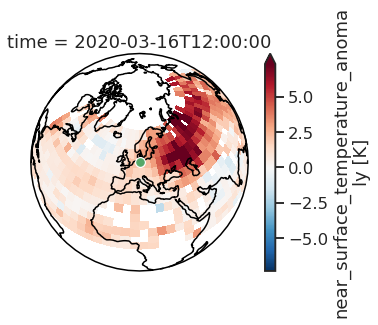

In [130]:
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.Orthographic(10, 53))
# slicing spatial dimensions
da.sel(time='2020-03',longitude=slice(-80,150),latitude=slice(0,70)).plot(ax=ax,
    transform=ccrs.PlateCarree(),
    robust=True) # robust get 2-98 quantiles
ax.set_global()
ax.coastlines()
plt.plot(10, 53, markersize=20, marker=".", color="w")
plt.plot(10, 53, markersize=15, marker=".", color="g")

## example: Warming of the oceans per latitude over time

Quick example how to prototype a scientific figure.

Scientific question: Does Earth warm over time? Where is the strongest warming? North pol, South Pol, Tropics?

/work/mh0727/m300524/miniconda3/envs/pymistral/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


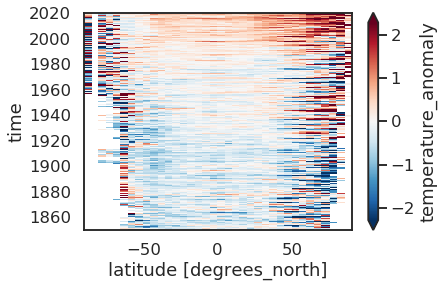

In [131]:
# naive first plot
da.mean("longitude").plot(robust=True)

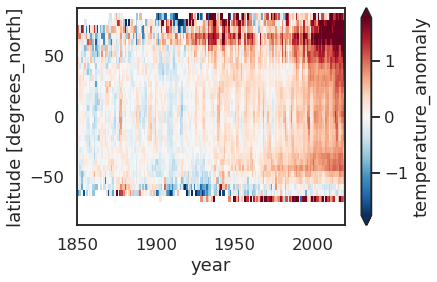

In [132]:
# seasonal cycle and latitudinal gradient dominates: polar oceans are cooler than the tropics
# set a different reference time for anomaly calculation

# readble in xarray, a nightmare remembering indices and dimension ordering in numpy
(da-da.sel(time=slice('1850','1900')).mean('time')).groupby('time.year').mean('time').mean('longitude').T.plot(robust=True)

## `intake-xarray`

- avoid copy pasting for accessing data
- distinction between data curator and analyst roles
- access data without learning every backend API
- version control data sources
- cache remote data sources
- see https://intake.readthedocs.io/en/latest/use_cases.html

In [133]:
import intake
# update path
obs_cat = intake.open_catalog("~/remote_obs_cache.yml")

In [134]:
!cat ~/remote_obs_cache.yml | head -28

plugins:
  source:
    - module: intake_xarray
sources:
  gistemp:
    description: GISTEMP
    driver: netcdf
    args:
      urlpath: https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz
      chunks: {'time':'auto'}
      xarray_kwargs:
        combine: nested
    cache:
      - type: compressed
        decomp: gz
        argkey: urlpath

  HadCRUT4:
    description: HadCRUT
    driver: netcdf
    cache:
      - type: file
        argkey: urlpath
    args:
      urlpath: https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT.4.6.0.0.median.nc

  HadISST:
    description: HadISST


In [135]:
# data is cached on disk after first use
ds_cat = obs_cat["HadCRUT4"].to_dask().load()

In [137]:
xr.testing.assert_identical(ds_cat, ds)

# assessing `CMIP6` data with `intake` with `dask`

CMIP6 for next IPCC report: 2021

The objective of the Coupled Model Intercomparison Project (`CMIP`) is to better understand past, present and future climate changes arising from natural, unforced variability or in response to changes in radiative forcing in a multi-model context.
- https://www.wcrp-climate.org/wgcm-cmip 
- https://www.mpimet.mpg.de/en/science/projects/integrated-activities/cmip6/

In [141]:
#from IPython.display import Image
#Image(url="https://www.mpimet.mpg.de/fileadmin/projekte/CMIP6/160621_CMIP6_Organigramm_web.png")

In [138]:
# ~30 PB output downloaded to supercomputer organized in a folder structure formatted to common requirements
#                             ... /activity_id/institution_id/source_id/experiment_id/member_id/table_id/variable_id/grid_label/version/file

tos_Omon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_185001-186912.nc
tos_Omon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_187001-188912.nc
tos_Omon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_189001-190912.nc
tos_Omon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_191001-192912.nc
tos_Omon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_193001-194912.nc
tos_Omon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_195001-196912.nc
tos_Omon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_197001-198912.nc
tos_Omon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_199001-200912.nc
tos_Omon_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_201001-201412.nc


In [215]:
# to see dashboard and use distributed scheduler
# Setup a dask cluster
from dask_gateway import Gateway
from dask.distributed import Client

gateway = Gateway()
cluster = gateway.new_cluster()

cluster.adapt(minimum=2,maximum=8)

cluster.scale(4)


client = Client(cluster)
client

Number of CPUs: 72, number of threads: 36, number of workers: 2


<Client: 'inproc://10.50.41.203/54673/353' processes=2 threads=72, memory=128.00 GB>

In [140]:
# intake facilitates file browsing and access, checkout intake for reading in .csv files
# and plugins for S3, SQL, etc ... https://intake.readthedocs.io/en/latest/plugin-directory.html
import intake

In [141]:
# json file contains the rules for concat and merge as well as the location for the catalog .csv file
col_url = "https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"

`intake-esm` loads a csv-file containing all available datasets given in that `json` file. 

In [143]:
col = intake.open_esm_datastore(col_url)
col

In [145]:
# col.df is a pandas.DataFrame
col.df.head()

activity_id     institution_id        source_id   experiment_id member_id  \
0  AerChemMIP  HAMMOZ-Consortium  MPI-ESM-1-2-HAM  ssp370-lowNTCF  r1i1p1f1   
1  AerChemMIP  HAMMOZ-Consortium  MPI-ESM-1-2-HAM  ssp370-lowNTCF  r1i1p1f1   
2  AerChemMIP  HAMMOZ-Consortium  MPI-ESM-1-2-HAM  ssp370-lowNTCF  r1i1p1f1   
3  AerChemMIP  HAMMOZ-Consortium  MPI-ESM-1-2-HAM  ssp370-lowNTCF  r1i1p1f1   
4  AerChemMIP  HAMMOZ-Consortium  MPI-ESM-1-2-HAM  ssp370-lowNTCF  r1i1p1f1   

  table_id variable_id grid_label  dcpp_init_year    version     time_range  \
0     Lmon         npp         gn             NaN  v20190627  203501-205412   
1     Lmon         npp         gn             NaN  v20190627  201501-203412   
2     Lmon         npp         gn             NaN  v20190627  205501-205512   
3     Lmon         tsl         gn             NaN  v20190627  205501-205512   
4     Lmon         tsl         gn             NaN  v20190627  201501-203412   

                                                path  
0  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Aer...  
1  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Aer...  
2  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Aer...  
3  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Aer...  
4  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Aer...

In [146]:
# overview of available keys and accepted values
uni_dict = col.unique(["source_id", "institution_id", "table_id", "experiment_id"])
import pprint
#pprint.pprint(uni_dict, compact=True)

In [147]:
# quick check by hand
# col.df.source_id.unique()

## Global mean surface temperature `GMST` MPI-ESM-LR

Challenge: not all data is already downloaded, some variables/experiments won't even.

Scientific question: What level of warming do climate models simulate?

In [148]:
# col.search selects the experiments you specify in `query`
variable = "tas"
query = dict(
    experiment_id="historical",
    table_id="Amon",
    member_id="r1i1p1f1",
    variable_id=variable,
    source_id="MPI-ESM1-2-LR",
)
cat = col.search(**query)
cat.df.head()

activity_id institution_id      source_id experiment_id member_id table_id  \
0        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1     Amon   
1        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1     Amon   
2        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1     Amon   
3        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1     Amon   
4        CMIP          MPI-M  MPI-ESM1-2-LR    historical  r1i1p1f1     Amon   

  variable_id grid_label  dcpp_init_year    version     time_range  \
0         tas         gn             NaN  v20190710  189001-190912   
1         tas         gn             NaN  v20190710  201001-201412   
2         tas         gn             NaN  v20190710  195001-196912   
3         tas         gn             NaN  v20190710  197001-198912   
4         tas         gn             NaN  v20190710  187001-188912   

                                                path  
0  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...  
1  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...  
2  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...  
3  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...  
4  /mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/CMI...

In [149]:
# this gets xr.Datasets from netcdf files with `dask`
# concat according rules set in json
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True}, cdf_kwargs={"chunks": {"time": -1}})
# show the dict of available xr.Datasets: returned as dict because different models have different coordinates
list(dset_dict)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


['CMIP.MPI-M.MPI-ESM1-2-LR.historical.Amon.gn']

In [150]:
# get first item
_, ds = dset_dict.popitem()
# extract xr.dataArray
da = ds[variable].squeeze()

# lazy data: all I need to do is cdf_kwargs
print(type(da.data))
da.data

<class 'dask.array.core.Array'>


dask.array<getitem, shape=(1980, 96, 192), dtype=float32, chunksize=(240, 96, 192), chunktype=numpy.ndarray>

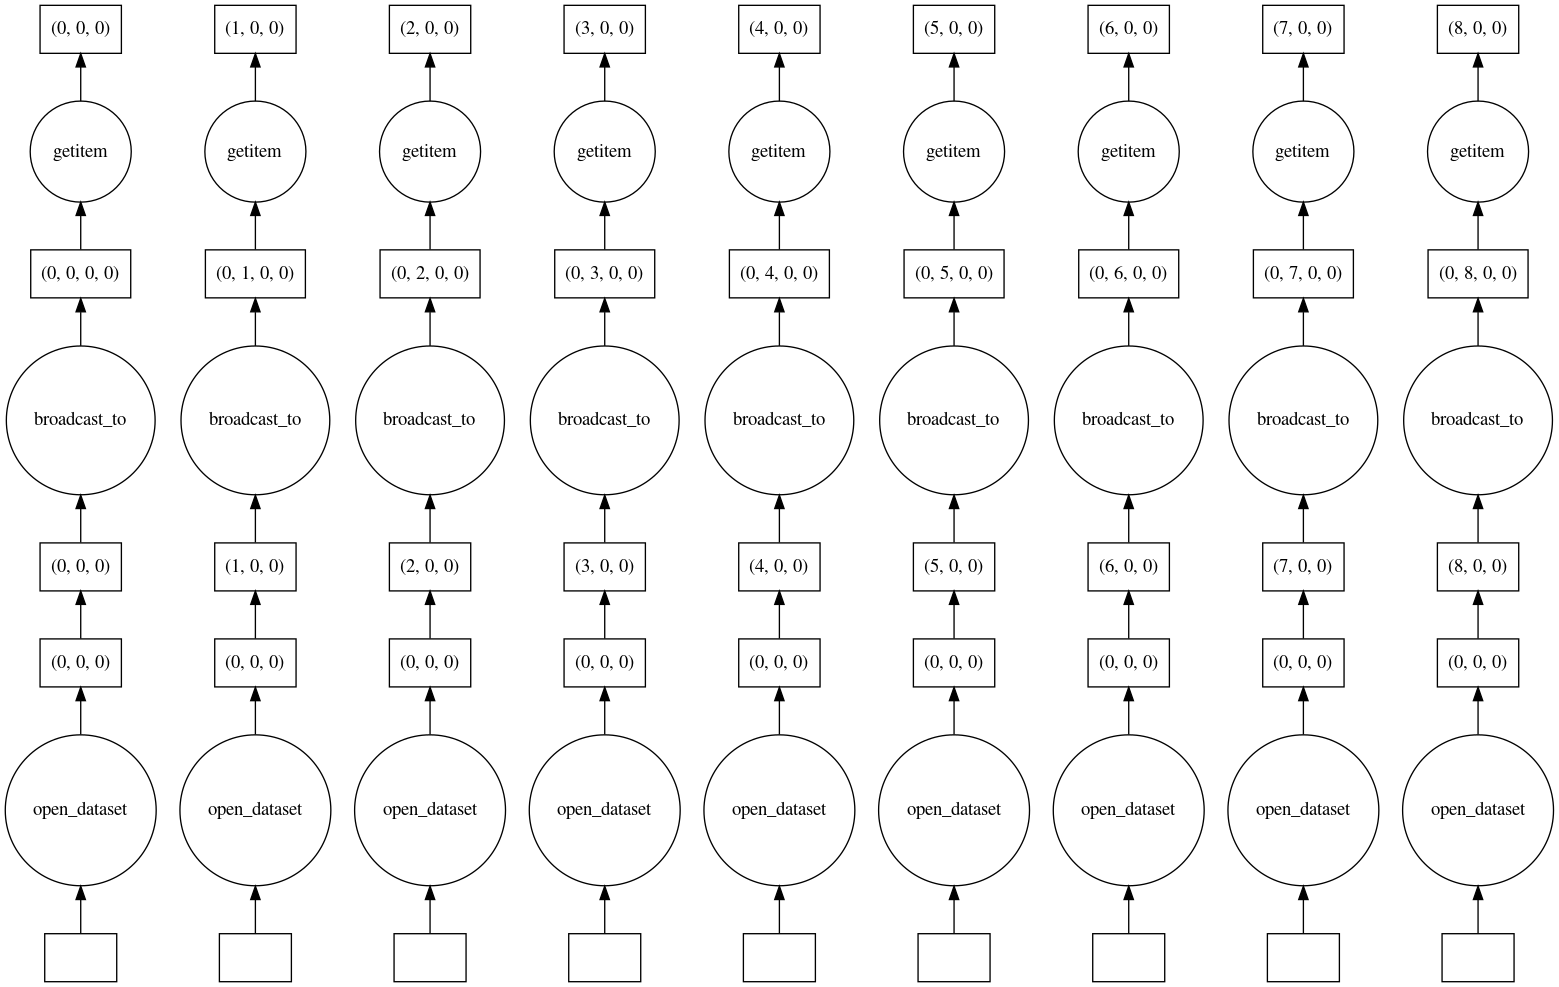

In [151]:
# embarrasingly parallel workflow
da.data.visualize()

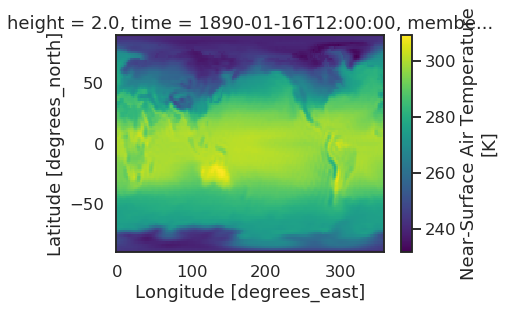

In [152]:
# weird is that .isel(time=0) is not 1850
da.isel(time=0).plot()

In [153]:
da = da.sortby("time")

In [154]:
# GMST often by yearly averages
def yearmean(ds, dim="time"):
    return ds.groupby(f"{dim}.year").mean().rename({"year": dim})

In [155]:
# remove seasonal cycle by yearmean for annual averages
da_ym = yearmean(da)

display(da_ym)

<xarray.DataArray 'tas' (time: 165, lat: 96, lon: 192)>
dask.array<stack, shape=(165, 96, 192), dtype=float32, chunksize=(1, 96, 192), chunktype=numpy.ndarray>
Coordinates:
    height     float64 2.0
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    member_id  <U8 'r1i1p1f1'
  * time       (time) int64 1850 1851 1852 1853 1854 ... 2011 2012 2013 2014

CPU times: user 3.18 s, sys: 1.01 s, total: 4.18 s
Wall time: 2.04 s


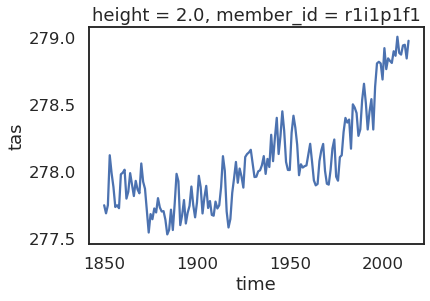

In [156]:
%time da_ym.mean(['lon','lat']).plot()

In [157]:
# yearmean creates a time chunk for each year
da_ym.data.visualize()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.796727 to fit


### xr.map_blocks
map calculation to each chunk like `dask.array.map_blocks`

In [158]:
# template sometimes needed when xr.map_blocks cannot guess the shape of the result in custom functions
template = da.sel(time=da.time.dt.month == 1).assign_coords(
    time=da.sel(time=da.time.dt.month == 1).time.dt.year
)
da_ym_map_blocks = xr.map_blocks(yearmean, da, template=template)
da_ym_map_blocks.data

dask.array<yearmean-1f8236abc443740f7b8426ccbc60ca58-<this, shape=(165, 96, 192), dtype=float32, chunksize=(20, 96, 192), chunktype=numpy.ndarray>

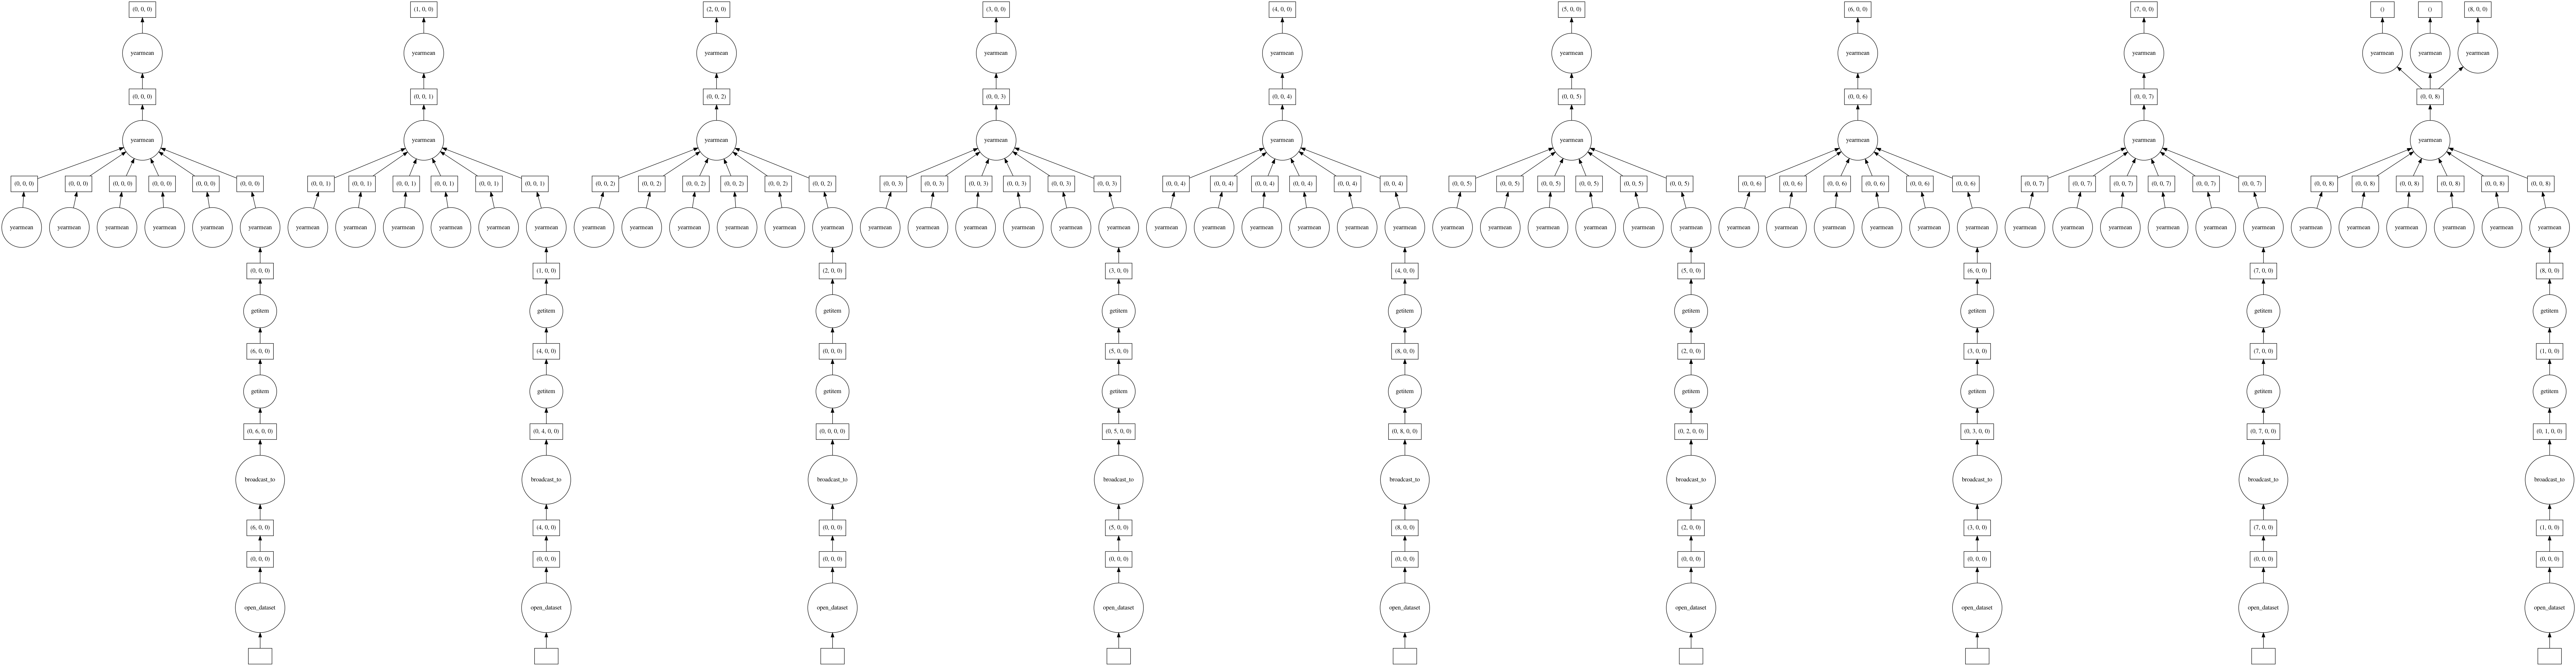

In [159]:
# map_blocks applies function calculate_anomaly to each block once,
# whereas without map_blocks calculate_anomaly is calculated for each year
da_ym_map_blocks.data.visualize()

In [160]:
da_ym.data

dask.array<stack, shape=(165, 96, 192), dtype=float32, chunksize=(1, 96, 192), chunktype=numpy.ndarray>

- either more chunks and less tasks
- or less chunks and more tasks
- often same performance

CPU times: user 2.28 s, sys: 401 ms, total: 2.68 s
Wall time: 1.24 s
CPU times: user 3.05 s, sys: 594 ms, total: 3.64 s
Wall time: 1.85 s


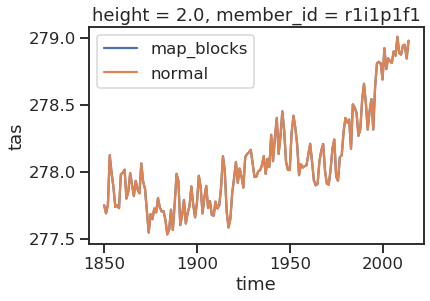

In [166]:
# yields same results
# faster bcos larger chunks less tasks
%time da_ym_map_blocks.mean(['lon','lat']).plot(label='map_blocks')

# slower bcos every task comes with tiny overhead for dask
%time da_ym.mean(['lon','lat']).plot(label='normal')
plt.legend()

## multi-model analysis

Which level of warming do all models simulate?

In [167]:
# col.search selects the experiments you specify in `query`
# unselect source_id, takes all it finds
variable = "tas"
query = dict(
    experiment_id="historical",
    table_id="Amon",
    member_id="r1i1p1f1",
    variable_id=variable,
    # source_id="MPI-ESM1-2-LR",
)
cat = col.search(**query)
source_ids = list(cat.df.source_id.unique())
# some data cleaning: wrong times found
for models in ["E3SM-1-1-ECA", "NorCPM1", "FGOALS-g3"]:
    source_ids.remove(models)
cat = col.search(**query, source_id=source_ids)
cat

In [168]:
# cdf_kwargs are given to xarray.open_dataset
# cftime is like datetime but extends to all four digit years and many calendar types
dset_dict = cat.to_dataset_dict(
    cdf_kwargs={"chunks": {"time": -1}, "use_cftime": True},
    zarr_kwargs={'consolidated': True}
)
# return dict because models different spatial dimensions
list(dset_dict)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/work/mh0727/m300524/miniconda3/envs/pymistral/lib/python3.7/site-packages/xarray/conventions.py:498: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


['CMIP.CAS.CAS-ESM2-0.historical.Amon.gn',
 'CMIP.BCC.BCC-CSM2-MR.historical.Amon.gn',
 'CMIP.CAS.FGOALS-f3-L.historical.Amon.gr',
 'CMIP.BCC.BCC-ESM1.historical.Amon.gn',
 'CMIP.CAMS.CAMS-CSM1-0.historical.Amon.gn',
 'CMIP.NCAR.CESM2-WACCM.historical.Amon.gn',
 'CMIP.NUIST.NESM3.historical.Amon.gn',
 'CMIP.THU.CIESM.historical.Amon.gr',
 'CMIP.CSIRO.ACCESS-ESM1-5.historical.Amon.gn',
 'CMIP.FIO-QLNM.FIO-ESM-2-0.historical.Amon.gn',
 'CMIP.MRI.MRI-ESM2-0.historical.Amon.gn',
 'CMIP.NIMS-KMA.KACE-1-0-G.historical.Amon.gr',
 'CMIP.CCCma.CanESM5.historical.Amon.gn',
 'CMIP.IPSL.IPSL-CM6A-LR.historical.Amon.gr',
 'CMIP.NCAR.CESM2.historical.Amon.gn',
 'CMIP.CSIRO-ARCCSS.ACCESS-CM2.historical.Amon.gn',
 'CMIP.UA.MCM-UA-1-0.historical.Amon.gn',
 'CMIP.INM.INM-CM5-0.historical.Amon.gr1',
 'CMIP.NOAA-GFDL.GFDL-CM4.historical.Amon.gr1',
 'CMIP.MIROC.MIROC6.historical.Amon.gn',
 'CMIP.NOAA-GFDL.GFDL-ESM4.historical.Amon.gr1',
 'CMIP.INM.INM-CM4-8.historical.Amon.gr1',
 'CMIP.NASA-GISS.GISS-E2-1-

In [169]:
# ultimate goal to get all data into one object: will ease following computation
da = []
modellist = []
orig_size = 0

expected_time = xr.cftime_range(start="1850", freq="MS", periods=165 * 12)
for key, value in dset_dict.items():
    model = key.split(".")[2]
    # print(f"Processing {model} ...")
    da_model = value["tas"].squeeze()
    # display(da_model)
    # track dataset size processed
    orig_size += da_model.nbytes
    # spatial mean: gmst
    spatial_dims = [d for d in da_model.dims if d not in ["time"]]
    da_model_spatial_mean = da_model.mean(spatial_dims).sortby("time")
    # often time is differently formatted, therefore overwrite
    da_model_spatial_mean["time"] = expected_time
    # rechunk time, see dashboard task graph
    da_model_spatial_mean = da_model_spatial_mean.chunk({"time": -1})
    da.append(da_model_spatial_mean)
    modellist.append(model)

In [170]:
da = xr.concat(da, dim="model", coords="minimal")
da["model"] = modellist

da.data

dask.array<concatenate, shape=(37, 1980), dtype=float32, chunksize=(1, 1980), chunktype=numpy.ndarray>

In [171]:
from dask.utils import format_bytes

print(f"Collapsed {format_bytes(orig_size)} into {format_bytes(da.nbytes)}")

Collapsed 11.30 GB into 293.04 kB


In [172]:
# trigger execution, remaining coding is data light and better suited for eager data
%time da = da.compute()

CPU times: user 2min 50s, sys: 28 s, total: 3min 18s
Wall time: 1min 47s


In [173]:
# usually I save important intermediate data to to disk (large data preferably in zarr format)
# the dashboard shows that I/O is the bottleneck

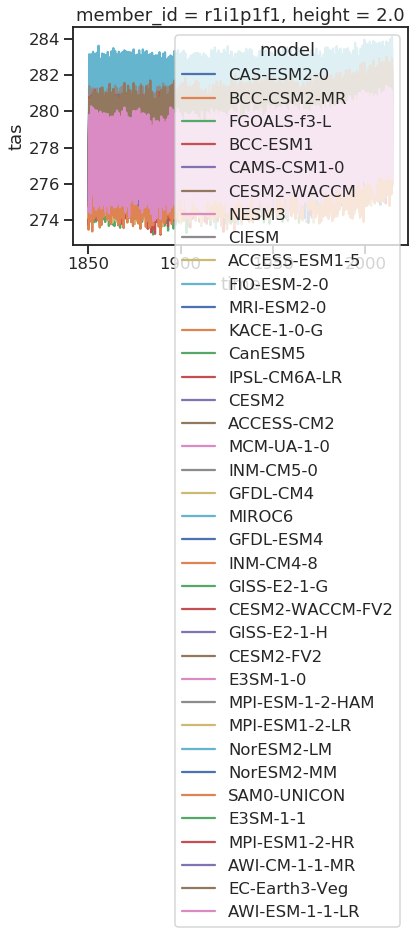

In [174]:
# look into the data
# strong seasonal cycle, models have different base levels
da.plot(hue="model")
plt.show()

In [175]:
# best practice: all data into one xr.object, the do the math afterwards with automatic broadcasting
# add observations to da
obs = (
    obs_cat["HadCRUT4"]
    .to_dask()
    .load()
    .rename({"temperature_anomaly": "tas"})["tas"]
    .squeeze()
)

obs = obs.expand_dims("model")
obs["model"] = ["HadCRUT4 obs"]
obs["time"] = xr.cftime_range(start="1850", freq="MS", periods=obs.time.size)
obs = obs.sel(time=slice("1850", "2019"))

obss = obs.mean(["longitude", "latitude"])
da = xr.concat([obss, da], "model")

/work/mh0727/m300524/miniconda3/envs/pymistral/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


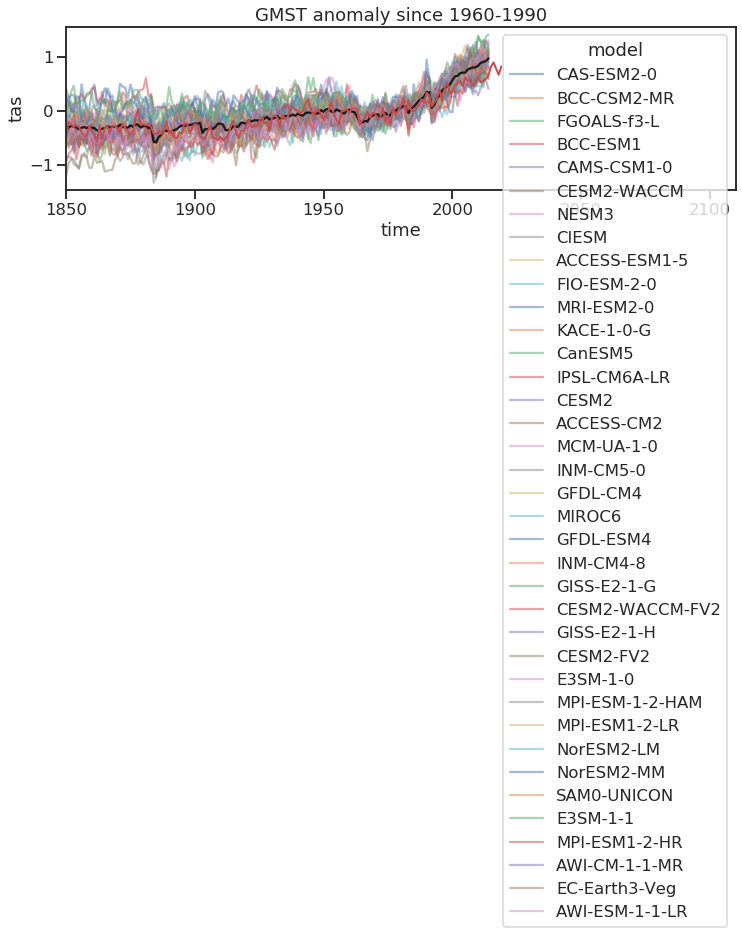

In [176]:
# anomaly plot
anom = yearmean(da - da.sel(time=slice("1960", "1990")).mean("time"))
anom.drop_sel(model="HadCRUT4 obs").plot(hue="model", figsize=(12, 3), alpha=0.5)
anom.drop_sel(model="HadCRUT4 obs").mean('model').plot(c='k')
anom.sel(model="HadCRUT4 obs").plot(c="r", lw=2)
plt.title("GMST anomaly since 1960-1990")
plt.xlim([1850, 2110])
plt.show()

- global warming hiatus period due to internal variability: ~2000-2010
- CMIP6 higher climate sensitivity (warming to doubling of greenhouse gases) than CMIP5 models

## warming over the last 30 years
Scientific question: Where do the climate models simulate the stronger warming?

All climate models may have different resolution, therefore the coordinates are not identical, so we cannot create one large `xr.DataArray` unless we regrid with `xesmf`.

In [177]:
# rename inconsistencies from CMIP6
from cmip6_preprocessing.preprocessing import (
    combined_preprocessing,
    correct_lon,
)

In [178]:
import xesmf as xe
import xarray as xr

deg = 5


def regrid(ds, deg=deg, **kwargs):
    ds_out = xe.util.grid_global(deg, deg)
    regridder = xe.Regridder(ds, ds_out, "bilinear", reuse_weights=True, **kwargs)
    ds_out = regridder(ds)
    return ds_out


expected_time = xr.cftime_range(start="1850", freq="MS", periods=165 * 12)
da_regrid = []
modellist = []
for i, (key, ds) in enumerate(dset_dict.items()):
    if i == 15:
        break
    da_model = correct_lon(ds)["tas"].squeeze()
    model = key.split(".")[2]
    print(f"Processing {model} ...")
    spatial_dims = [d for d in da_model.dims if d not in ["time"]]
    # data cleaning
    if set(spatial_dims) != set(["lon", "lat"]):
        print("reset lon lat")
        da_model = da_model.rename({"longitude": "lon", "latitude": "lat"})
    # often time is differently formatted, therefore overwrite
    da_model = da_model.sortby("time")
    da_model["time"] = expected_time
    # take 30 years
    da_model = da_model.sel(time=slice("1985", "2014"))
    da_regrid.append(regrid(da_model))
    modellist.append(model)

Processing CAS-ESM2-0 ...
Reuse existing file: bilinear_128x256_36x72.nc
Processing BCC-CSM2-MR ...
Reuse existing file: bilinear_160x320_36x72.nc
Processing FGOALS-f3-L ...
Reuse existing file: bilinear_180x288_36x72.nc
Processing BCC-ESM1 ...
Reuse existing file: bilinear_64x128_36x72.nc
Processing CAMS-CSM1-0 ...
Reuse existing file: bilinear_160x320_36x72.nc
Processing CESM2-WACCM ...
Reuse existing file: bilinear_192x288_36x72.nc
Processing NESM3 ...
Create weight file: bilinear_96x192_36x72.nc
Processing CIESM ...
Reuse existing file: bilinear_192x288_36x72.nc
Processing ACCESS-ESM1-5 ...
Create weight file: bilinear_145x192_36x72.nc
Processing FIO-ESM-2-0 ...
Reuse existing file: bilinear_192x288_36x72.nc
Processing MRI-ESM2-0 ...
Reuse existing file: bilinear_160x320_36x72.nc
Processing KACE-1-0-G ...
Reuse existing file: bilinear_144x192_36x72.nc
Processing CanESM5 ...
Reuse existing file: bilinear_64x128_36x72.nc
Processing IPSL-CM6A-LR ...
Reuse existing file: bilinear_143x1

In [179]:
# embarrasingly parallel over dimensions: model, x(lon), y(lat)
# one time dimension chunk because yearmean and trend
da_regrid = xr.concat(da_regrid, dim="model", coords="minimal")
da_regrid["model"] = modellist
da_regrid.data

dask.array<concatenate, shape=(15, 360, 36, 72), dtype=float64, chunksize=(1, 360, 36, 72), chunktype=numpy.ndarray>

In [189]:
da_regrid_ym = yearmean(da_regrid)

In [190]:
da_trend = (
    da_regrid_ym.polyfit("time", 1)
    .sel(degree=1)
    .rename({"polyfit_coefficients": "trend"})["trend"]
    * da_regrid_ym.time.size
)

In [182]:
%time da_trend = da_trend.compute()

CPU times: user 38.1 s, sys: 11.3 s, total: 49.5 s
Wall time: 23.3 s


In [184]:
# fix dropped coords
for c in ["lon", "lat"]:
    da_trend[c] = xe.util.grid_global(deg, deg)[c]

In [ ]:
# xarray facet grid plot with cartopy
fg = da_trend.plot(
    col="model",
    col_wrap=5,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree()},
    robust=True,
    aspect=2.5,
    cbar_kwargs={
        "label": "Surface Temperature Trend [$^\circ C / 30 yrs$]",
    },
)

# lets add a coastline to each axis
# great reason to use FacetGrid.map
fg.map(lambda: plt.gca().coastlines())

- Polar amplification: Changes in net radiation warm poles much more than tropics. https://en.wikipedia.org/wiki/Polar_amplification
- Internal variability: In some model simulations as in the real world, large areas experience cooling rather than warming. This is due to natural variability, because the atmosphere is chaotic and not deterministic. The same model with slightly different initial conditions can produce a warming trend when rerunning.

In [219]:
client.close()